In [1]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np
from dotmap import DotMap

from verifai.samplers.scenic_sampler import ScenicSampler
from verifai.scenic_server import ScenicServer
from verifai.falsifier import generic_falsifier, generic_parallel_falsifier
from verifai.monitor import multi_objective_monitor, specification_monitor
from verifai.falsifier import generic_falsifier
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

/Users/kesav/Documents/Carla/Scenic-devel/src/scenic/core/errors.py:157: UserWarning: unable to install sys.excepthook to format Scenic backtraces
  warnings.warn('unable to install sys.excepthook to format Scenic backtraces')


In [2]:
# The specification must assume multi_objective_monitor class
class confidence_spec(specification_monitor):
    def __init__(self):
        def specification(traj):
            min_dist = np.inf
            for i, val in enumerate(traj):
                obj1, obj2 = val
                min_dist = min(min_dist, obj1.distanceTo(obj2))
            for i, val in enumerate(traj[1:]):
                obj1, _ = val
                obj1_prev, _ = traj[i - 1]
                heading = obj1_prev - obj1
                print(f'heading = {heading}')
            # print(min_dist)
            return min_dist - 5
        
        super().__init__(specification)

In [3]:
def test_driving_dynamic():

    path = 'scenic_driving.scenic'
    sampler = ScenicSampler.fromScenario(path)
    falsifier_params = DotMap(
        n_iters=100,
        save_error_table=True,
        save_safe_table=True,
    )
    server_options = DotMap(maxSteps=2, verbosity=0)
    monitor = confidence_spec()
    
    falsifier = generic_falsifier(sampler=sampler,
                                  falsifier_params=falsifier_params,
                                  server_class=ScenicServer,
                                  server_options=server_options,
                                  monitor=monitor)
    t0 = time.time()
    falsifier.run_falsifier()
    t = time.time() - t0
    print(f'Generated {len(falsifier.samples)} samples in {t} seconds with 1 worker')
    print(f'Number of counterexamples: {len(falsifier.error_table.table)}')
    return falsifier

In [4]:
falsifier = test_driving_dynamic()

sampler type is eg
Creating epsilon-greedy sampler
Initializing server
Running falsifier; server class is <class 'verifai.scenic_server.ScenicServer'>
bucket_vals = [3 1]
bucket_vals = [4 2]
heading = (0.0 @ 0)
heading = (0.0 @ 0)
bucket_vals = [2 2]
bucket_vals = [3 2]
bucket_vals = [3 3]
bucket_vals = [4 0]
bucket_vals = [0 1]
bucket_vals = [3 3]
bucket_vals = [2 3]
bucket_vals = [0 4]
bucket_vals = [4 4]
heading = (0.0 @ 0)
heading = (0.0 @ 0)
bucket_vals = [4 0]
bucket_vals = [4 4]
bucket_vals = [1 2]
bucket_vals = [0 1]
bucket_vals = [4 4]
heading = (0.0 @ 0)
heading = (0.0 @ 0)
bucket_vals = [4 2]
bucket_vals = [4 4]
bucket_vals = [3 2]
bucket_vals = [4 4]
heading = (0.0 @ 0)
heading = (0.0 @ 0)
bucket_vals = [4 3]
heading = (0.0 @ 0)
heading = (0.0 @ 0)
bucket_vals = [4 0]
bucket_vals = [4 4]
heading = (0.0 @ 0)
heading = (0.0 @ 0)
bucket_vals = [4 0]
bucket_vals = [3 4]
bucket_vals = [4 2]
bucket_vals = [4 2]
heading = (0.0 @ 0)
heading = (0.0 @ 0)
bucket_vals = [0 4]
bucket_va

bucket_vals = [4 2]
bucket_vals = [3 2]
bucket_vals = [3 2]
bucket_vals = [3 0]
bucket_vals = [3 3]
bucket_vals = [2 1]
bucket_vals = [0 2]
bucket_vals = [3 4]
bucket_vals = [1 1]
bucket_vals = [1 2]
bucket_vals = [1 4]
bucket_vals = [3 2]
bucket_vals = [0 0]
bucket_vals = [3 3]
bucket_vals = [2 3]
bucket_vals = [4 2]
bucket_vals = [2 1]
bucket_vals = [4 1]
bucket_vals = [2 4]
bucket_vals = [2 4]
bucket_vals = [2 4]
bucket_vals = [2 0]
bucket_vals = [1 1]
bucket_vals = [0 1]
bucket_vals = [0 4]
bucket_vals = [2 2]
bucket_vals = [1 4]
bucket_vals = [3 1]
bucket_vals = [3 0]
bucket_vals = [1 0]
bucket_vals = [2 3]
bucket_vals = [0 4]
bucket_vals = [0 4]
bucket_vals = [1 3]
bucket_vals = [0 1]
bucket_vals = [2 2]
bucket_vals = [0 0]
bucket_vals = [3 1]
bucket_vals = [0 2]
bucket_vals = [2 2]
bucket_vals = [2 1]
bucket_vals = [0 4]
bucket_vals = [0 2]
bucket_vals = [1 3]
bucket_vals = [4 1]
bucket_vals = [4 2]
bucket_vals = [0 1]
bucket_vals = [1 2]
bucket_vals = [3 2]
bucket_vals = [4 3]


bucket_vals = [4 4]
bucket_vals = [2 1]
bucket_vals = [1 4]
bucket_vals = [1 2]
bucket_vals = [4 3]
bucket_vals = [2 0]
bucket_vals = [0 0]
bucket_vals = [1 3]
bucket_vals = [1 2]
bucket_vals = [4 0]
bucket_vals = [4 4]
bucket_vals = [1 0]
bucket_vals = [4 4]
heading = (0.0 @ 0)
heading = (0.0 @ 0)
bucket_vals = [4 0]
bucket_vals = [0 4]
bucket_vals = [4 3]
bucket_vals = [4 4]
bucket_vals = [4 4]
bucket_vals = [4 3]
bucket_vals = [4 4]
bucket_vals = [4 4]
heading = (0.0 @ 0)
heading = (0.0 @ 0)
bucket_vals = [1 0]
bucket_vals = [4 3]
bucket_vals = [3 1]
bucket_vals = [3 1]
bucket_vals = [3 2]
bucket_vals = [0 3]
bucket_vals = [4 4]
bucket_vals = [2 3]
bucket_vals = [1 4]
bucket_vals = [1 4]
bucket_vals = [3 1]
bucket_vals = [0 4]
bucket_vals = [0 1]
bucket_vals = [3 3]
bucket_vals = [1 2]
bucket_vals = [1 0]
bucket_vals = [2 3]
bucket_vals = [1 2]
bucket_vals = [0 2]
bucket_vals = [4 1]
bucket_vals = [3 0]
bucket_vals = [3 4]
bucket_vals = [1 2]
bucket_vals = [2 2]
bucket_vals = [4 1]


bucket_vals = [0 1]
bucket_vals = [3 2]
bucket_vals = [2 0]
bucket_vals = [1 3]
bucket_vals = [0 4]
bucket_vals = [0 4]
bucket_vals = [3 2]
bucket_vals = [4 1]
bucket_vals = [4 4]
bucket_vals = [4 3]
bucket_vals = [1 3]
bucket_vals = [2 0]
bucket_vals = [3 1]
bucket_vals = [4 3]
heading = (0.0 @ 0)
heading = (0.0 @ 0)
bucket_vals = [1 2]
bucket_vals = [3 2]
bucket_vals = [3 0]
bucket_vals = [2 0]
bucket_vals = [1 3]
bucket_vals = [0 4]
bucket_vals = [2 2]
bucket_vals = [0 3]
bucket_vals = [4 0]
bucket_vals = [0 0]
bucket_vals = [2 3]
bucket_vals = [4 3]
bucket_vals = [1 2]
bucket_vals = [1 0]
bucket_vals = [2 3]
bucket_vals = [2 3]
bucket_vals = [0 4]
bucket_vals = [2 3]
bucket_vals = [4 2]
heading = (0.0 @ 0)
heading = (0.0 @ 0)
bucket_vals = [3 1]
bucket_vals = [3 4]
bucket_vals = [3 0]
bucket_vals = [0 2]
bucket_vals = [0 2]
bucket_vals = [4 1]
bucket_vals = [1 2]
bucket_vals = [0 4]
bucket_vals = [2 1]
bucket_vals = [4 1]
bucket_vals = [3 4]
bucket_vals = [4 4]
bucket_vals = [0 0]


bucket_vals = [2 1]
bucket_vals = [4 3]
bucket_vals = [2 3]
bucket_vals = [2 1]
bucket_vals = [0 4]
bucket_vals = [4 0]
bucket_vals = [0 1]
bucket_vals = [4 3]
bucket_vals = [0 2]
bucket_vals = [2 4]
bucket_vals = [4 2]
bucket_vals = [4 4]
bucket_vals = [1 0]
bucket_vals = [2 2]
bucket_vals = [0 4]
bucket_vals = [3 2]
bucket_vals = [1 0]
bucket_vals = [3 1]
bucket_vals = [0 4]
bucket_vals = [0 4]
bucket_vals = [2 3]
bucket_vals = [2 2]
bucket_vals = [0 1]
bucket_vals = [3 2]
bucket_vals = [2 2]
bucket_vals = [4 0]
bucket_vals = [1 1]
bucket_vals = [4 2]
bucket_vals = [2 0]
bucket_vals = [3 1]
bucket_vals = [0 2]
bucket_vals = [4 0]
bucket_vals = [2 0]
bucket_vals = [4 4]
bucket_vals = [3 0]
bucket_vals = [3 2]
bucket_vals = [1 4]
bucket_vals = [4 3]
bucket_vals = [3 2]
bucket_vals = [0 0]
bucket_vals = [4 3]
bucket_vals = [0 1]
bucket_vals = [4 4]
heading = (0.0 @ 0)
heading = (0.0 @ 0)
bucket_vals = [4 2]
heading = (0.0 @ 0)
heading = (0.0 @ 0)
bucket_vals = [2 2]
bucket_vals = [1 3]


heading = (0.0 @ 0)
heading = (0.0 @ 0)
bucket_vals = [4 4]
bucket_vals = [4 4]
bucket_vals = [4 4]
bucket_vals = [4 4]
bucket_vals = [4 3]
bucket_vals = [4 4]
heading = (0.0 @ 0)
heading = (0.0 @ 0)
bucket_vals = [4 3]
bucket_vals = [4 4]
bucket_vals = [4 3]
bucket_vals = [4 3]
heading = (0.0 @ 0)
heading = (0.0 @ 0)
bucket_vals = [4 3]
bucket_vals = [4 3]
bucket_vals = [4 4]
bucket_vals = [4 4]
bucket_vals = [4 4]
bucket_vals = [4 3]
bucket_vals = [4 3]
bucket_vals = [4 3]
heading = (0.0 @ 0)
heading = (0.0 @ 0)
bucket_vals = [3 0]
bucket_vals = [0 0]
bucket_vals = [4 2]
bucket_vals = [2 0]
bucket_vals = [4 2]
heading = (0.0 @ 0)
heading = (0.0 @ 0)
bucket_vals = [3 1]
bucket_vals = [3 0]
bucket_vals = [0 2]
bucket_vals = [3 3]
bucket_vals = [1 0]
bucket_vals = [1 2]
bucket_vals = [0 2]
bucket_vals = [1 1]
bucket_vals = [1 1]
bucket_vals = [0 2]
bucket_vals = [1 0]
bucket_vals = [3 0]
bucket_vals = [3 4]
bucket_vals = [0 4]
bucket_vals = [3 4]
bucket_vals = [1 3]
bucket_vals = [2 4]


In [5]:
falsifier.error_table.table

,point.objects.object0.color[0],point.objects.object0.color[1],point.objects.object0.color[2],point.objects.object0.heading,point.objects.object0.position[0],point.objects.object0.position[1],point.objects.object0.velocity[0],point.objects.object0.velocity[1],point.objects.object1.color[0],point.objects.object1.color[1],point.objects.object1.color[2],point.objects.object1.heading,point.objects.object1.position[0],point.objects.object1.position[1],point.objects.object1.velocity[0],point.objects.object1.velocity[1],rho
0,0.660237,0.254417,0.254417,1.928930,4.882679,2.0,-0.0,0.0,0.654168,0.629335,0.593979,-1.014559,4.426464,-2.0,0.0,0.0,-0.974068
1,0.728495,0.702923,0.702923,1.928930,4.861530,2.0,-0.0,0.0,0.733194,0.604767,0.604767,-1.052561,4.799357,-2.0,0.0,0.0,-0.999517
2,1.000000,1.000000,1.000000,1.966933,4.406600,2.0,-0.0,0.0,0.851534,0.685152,0.615992,-0.938553,3.696703,-2.0,0.0,0.0,-0.937494
3,0.723844,0.730843,0.457688,1.928930,4.864803,2.0,-0.0,0.0,0.733814,0.599131,0.370858,2.270956,2.771618,-2.0,-0.0,0.0,-0.485421
4,0.553991,0.479996,0.479996,1.928930,4.939251,2.0,-0.0,0.0,0.705334,0.705334,0.705334,-1.014559,4.455552,-2.0,0.0,0.0,-0.970861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.641758,0.552768,0.552768,1.928930,4.581959,2.0,-0.0,0.0,0.398297,0.398297,0.398297,-1.014559,4.260844,-2.0,0.0,0.0,-0.987131
63,0.689283,0.518661,0.485252,1.928930,4.853416,2.0,-0.0,0.0,0.733719,0.612521,0.612521,-0.938553,3.720777,-2.0,0.0,0.0,-0.842733
64,0.717750,0.717093,0.657752,1.928930,4.965664,2.0,-0.0,0.0,0.868501,0.658382,0.658382,-1.052561,4.810882,-2.0,0.0,0.0,-0.997006
65,0.493905,0.470264,0.456953,1.928930,4.893193,2.0,-0.0,0.0,0.617248,0.617248,0.617248,-1.014559,4.522308,-2.0,0.0,0.0,-0.982842


In [6]:
df = pd.concat([falsifier.safe_table.table, falsifier.error_table.table])

In [7]:
df

,point.objects.object0.color[0],point.objects.object0.color[1],point.objects.object0.color[2],point.objects.object0.heading,point.objects.object0.position[0],point.objects.object0.position[1],point.objects.object0.velocity[0],point.objects.object0.velocity[1],point.objects.object1.color[0],point.objects.object1.color[1],point.objects.object1.color[2],point.objects.object1.heading,point.objects.object1.position[0],point.objects.object1.position[1],point.objects.object1.velocity[0],point.objects.object1.velocity[1],rho
0,1.000000,1.000000,1.000000,1.928930,4.990766,2.0,-0.0,0.0,0.582423,0.512080,0.691976,2.489651,-0.267005,-2.0,-0.0,0.0,1.606373
1,0.979742,0.974938,0.974681,1.928930,4.752012,2.0,-0.0,0.0,0.728021,0.726949,0.703684,2.489651,-0.317796,-2.0,-0.0,0.0,1.457782
2,0.470583,0.482618,0.220347,1.928930,4.964915,2.0,-0.0,0.0,0.182697,0.182697,0.182697,2.400384,1.146622,-2.0,-0.0,0.0,0.529861
3,0.365436,0.365436,0.365436,1.966933,4.319727,2.0,-0.0,0.0,0.296788,0.296788,0.296788,2.400384,1.282384,-2.0,-0.0,0.0,0.022495
4,0.860124,0.860124,0.860124,1.928930,4.719518,2.0,-0.0,0.0,0.927907,0.927907,0.927907,2.489651,-0.336575,-2.0,-0.0,0.0,1.447020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.641758,0.552768,0.552768,1.928930,4.581959,2.0,-0.0,0.0,0.398297,0.398297,0.398297,-1.014559,4.260844,-2.0,0.0,0.0,-0.987131
63,0.689283,0.518661,0.485252,1.928930,4.853416,2.0,-0.0,0.0,0.733719,0.612521,0.612521,-0.938553,3.720777,-2.0,0.0,0.0,-0.842733
64,0.717750,0.717093,0.657752,1.928930,4.965664,2.0,-0.0,0.0,0.868501,0.658382,0.658382,-1.052561,4.810882,-2.0,0.0,0.0,-0.997006
65,0.493905,0.470264,0.456953,1.928930,4.893193,2.0,-0.0,0.0,0.617248,0.617248,0.617248,-1.014559,4.522308,-2.0,0.0,0.0,-0.982842


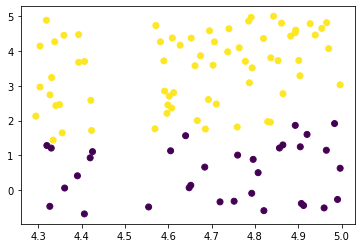

In [8]:
plt.scatter(df['point.objects.object0.position[0]'], df['point.objects.object1.position[0]'], c=df['rho'] < 0);